# **Akuransi sklearnPCA pada Data Iris**

**Naive PCA**

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv('https://raw.githubusercontent.com/Firdatulayuni/Pendata/main/diabetes.csv', sep=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [67]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

<ipython-input-69-bc4ec050f3d9>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.hist(X[y==lab, i],


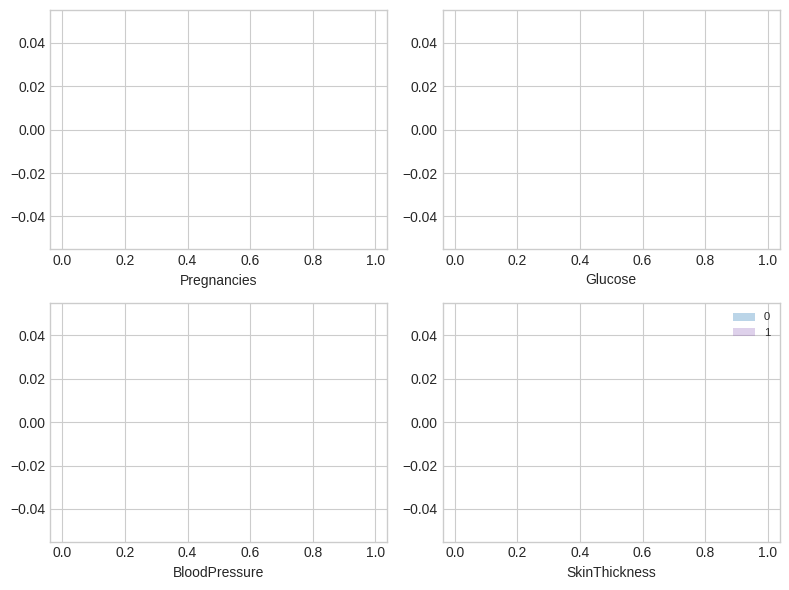

In [69]:
label_dict={1: '0',
           2: '1',}
feature_dict={0: 'Pregnancies',1: 'Glucose',2: 'BloodPressure',3: 'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('0','1'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [71]:
X_std.shape[0]-1

767

In [72]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)
                 

Covariance Matrix 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826]
 [ 0.12962746  1.00130378  0.15278853  0.05740263]
 [ 0.14146618  0.15278853  1.00130378  0.2076409 ]
 [-0.08177826  0.05740263  0.2076409   1.00130378]]


In [73]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826]
 [ 0.12962746  1.00130378  0.15278853  0.05740263]
 [ 0.14146618  0.15278853  1.00130378  0.2076409 ]
 [-0.08177826  0.05740263  0.2076409   1.00130378]]


In [74]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[-0.3802311  -0.66273917 -0.47243579  0.43932395]
 [-0.51768534 -0.23643252 -0.01615659 -0.8220952 ]
 [-0.65183196  0.14400966  0.65383237  0.35620155]
 [-0.4031641   0.69580003 -0.59080167  0.06537896]]
Eigenvelues 
[1.33359737 1.10266638 0.70768598 0.8612654 ]


**Korelasi Matriks**

In [75]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[-0.3802311  -0.66273917 -0.47243579  0.43932395]
 [-0.51768534 -0.23643252 -0.01615659 -0.8220952 ]
 [-0.65183196  0.14400966  0.65383237  0.35620155]
 [-0.4031641   0.69580003 -0.59080167  0.06537896]]
Eigenvelues 
[1.33186091 1.10123062 0.70676451 0.86014396]


**Eigendekomposisi data mentah berdasarkan matriks korelasi**

In [76]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[-0.3802311  -0.66273917 -0.47243579  0.43932395]
 [-0.51768534 -0.23643252 -0.01615659 -0.8220952 ]
 [-0.65183196  0.14400966  0.65383237  0.35620155]
 [-0.4031641   0.69580003 -0.59080167  0.06537896]]
Eigenvelues 
[1.33186091 1.10123062 0.70676451 0.86014396]


**Dekomposisi Nilai Singular**

In [77]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.3802311 ,  0.66273917, -0.43932395,  0.47243579],
       [-0.51768534,  0.23643252,  0.8220952 ,  0.01615659],
       [-0.65183196, -0.14400966, -0.35620155, -0.65383237],
       [-0.4031641 , -0.69580003, -0.06537896,  0.59080167]])

**Mengurutkan Eigenpair**

In [78]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


In [79]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.33186091183117
1.1012306163545809
0.8601439581670371
0.7067645136472116


**Menjelaskan Varians**

In [80]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

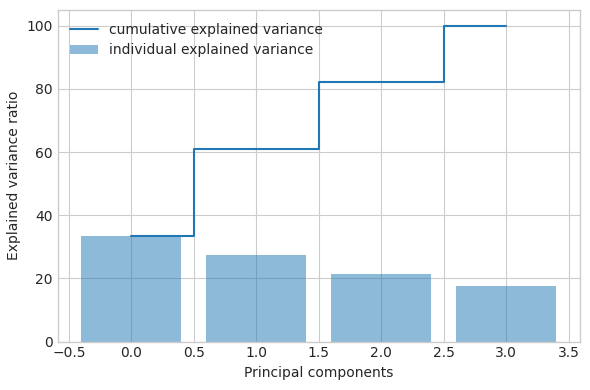

In [81]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**Matriks Proyeksi**

In [82]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.3802311  -0.66273917]
 [-0.51768534 -0.23643252]
 [-0.65183196  0.14400966]
 [-0.4031641   0.69580003]]


**Proyeksi Ke Ruang Fitur Baru**

In [83]:
Y = X_std.dot(matrix_w)

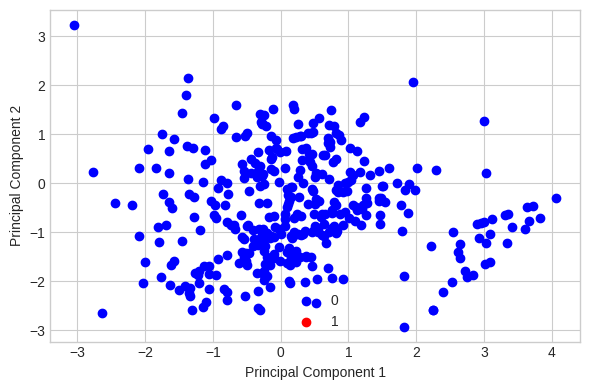

In [84]:
import matplotlib.pyplot as plt
import numpy as np

y = y.astype(str)  # Mengubah tipe data y menjadi str

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('0', '1'), ('blue', 'red')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

**Shortcut - PCA in scikit-learn**

In [85]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

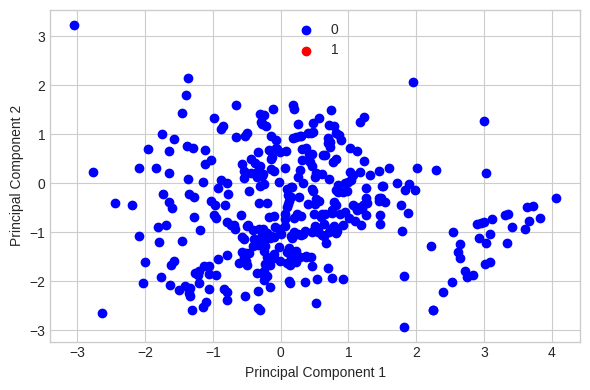

In [86]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('0', '1'),
                        ('blue', 'red')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

### **NAIVE PCA**

In [87]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-1.145812,0.028139
1,0.793426,1.171827
2,-0.783991,-2.211648
3,0.880356,0.880351
4,0.788250,1.052164
...,...,...
763,-1.299537,0.185858
764,-0.003180,0.643716
765,-0.291964,-0.099013
766,1.064732,-0.441968


In [88]:
data['Outcome']=df['Outcome']
data

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1
...,...,...,...
763,-1.299537,0.185858,0
764,-0.003180,0.643716,0
765,-0.291964,-0.099013,0
766,1.064732,-0.441968,1


In [89]:
dataset =data
X = dataset.iloc[:,:2].values
y = dataset['Outcome'].values
dataset.head(5)

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [93]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.7532467532467533


array([[88, 11],
       [27, 28]])

### **KNN PCA**

In [95]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-1.145812,0.028139
1,0.793426,1.171827
2,-0.783991,-2.211648
3,0.880356,0.880351
4,0.788250,1.052164
...,...,...
763,-1.299537,0.185858
764,-0.003180,0.643716
765,-0.291964,-0.099013
766,1.064732,-0.441968


In [96]:
data['Outcome']=df['Outcome']
data

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1
...,...,...,...
763,-1.299537,0.185858,0
764,-0.003180,0.643716,0
765,-0.291964,-0.099013,0
766,1.064732,-0.441968,1


In [97]:
dataset = data
X = dataset.iloc[:,:2].values
y = dataset['Outcome'].values
dataset.head(5)

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.6948051948051948


array([[79, 20],
       [27, 28]])

In [103]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
149,1,1
150,0,0
151,0,1
152,1,0


### **ANNBP PCA**

In [107]:
df=pd.read_csv('https://raw.githubusercontent.com/Firdatulayuni/Pendata/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y',]
data

,X,Y
0,-1.145812,0.028139
1,0.793426,1.171827
2,-0.783991,-2.211648
3,0.880356,0.880351
4,0.788250,1.052164
...,...,...
763,-1.299537,0.185858
764,-0.003180,0.643716
765,-0.291964,-0.099013
766,1.064732,-0.441968


In [109]:
data['Outcome']=df['Outcome']
data

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1
...,...,...,...
763,-1.299537,0.185858,0
764,-0.003180,0.643716,0
765,-0.291964,-0.099013,0
766,1.064732,-0.441968,1


In [110]:
dt=data
dt

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1
...,...,...,...
763,-1.299537,0.185858,0
764,-0.003180,0.643716,0
765,-0.291964,-0.099013,0
766,1.064732,-0.441968,1


In [112]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [113]:
y = dt['Outcome']
x = dt.drop(['Outcome'], axis=1)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=27)

In [115]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.001)

In [116]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

Iteration 1, loss = 0.69011779
Iteration 2, loss = 0.68778209
Iteration 3, loss = 0.68451085
Iteration 4, loss = 0.68081005
Iteration 5, loss = 0.67696872
Iteration 6, loss = 0.67257925
Iteration 7, loss = 0.66850908
Iteration 8, loss = 0.66486772
Iteration 9, loss = 0.66162283
Iteration 10, loss = 0.65885360
Iteration 11, loss = 0.65649147
Iteration 12, loss = 0.65431598
Iteration 13, loss = 0.65208454
Iteration 14, loss = 0.65006370
Iteration 15, loss = 0.64803458
Iteration 16, loss = 0.64601387
Iteration 17, loss = 0.64394829
Iteration 18, loss = 0.64194626
Iteration 19, loss = 0.63994066
Iteration 20, loss = 0.63820309
Iteration 21, loss = 0.63659411
Iteration 22, loss = 0.63507568
Iteration 23, loss = 0.63345130
Iteration 24, loss = 0.63192352
Iteration 25, loss = 0.63051566
Iteration 26, loss = 0.62919839
Iteration 27, loss = 0.62783382
Iteration 28, loss = 0.62649161
Iteration 29, loss = 0.62518012
Iteration 30, loss = 0.62390160
Iteration 31, loss = 0.62265108
Iteration 32, los

In [117]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [118]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
223,0,0
461,0,0
175,1,1
636,0,0
349,1,0
...,...,...
88,1,1
719,1,0
371,0,0
390,0,0


### **DT PCA**

In [119]:
df=pd.read_csv('https://raw.githubusercontent.com/Firdatulayuni/Pendata/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-1.145812,0.028139
1,0.793426,1.171827
2,-0.783991,-2.211648
3,0.880356,0.880351
4,0.788250,1.052164
...,...,...
763,-1.299537,0.185858
764,-0.003180,0.643716
765,-0.291964,-0.099013
766,1.064732,-0.441968


In [121]:
data['Outcome']=df['Outcome']
data

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1
...,...,...,...
763,-1.299537,0.185858,0
764,-0.003180,0.643716,0
765,-0.291964,-0.099013,0
766,1.064732,-0.441968,1


In [122]:
df = data
df

,X,Y,Outcome
0,-1.145812,0.028139,1
1,0.793426,1.171827,0
2,-0.783991,-2.211648,1
3,0.880356,0.880351,0
4,0.788250,1.052164,1
...,...,...,...
763,-1.299537,0.185858,0
764,-0.003180,0.643716,0
765,-0.291964,-0.099013,0
766,1.064732,-0.441968,1


In [123]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [124]:
df.isnull().sum()

X          0
Y          0
Outcome    0
dtype: int64

In [125]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

In [126]:
X_train.shape, X_test.shape

((614, 2), (154, 2))

In [129]:
X_train.dtypes

X    float64
Y    float64
dtype: object

In [130]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [131]:
encoder = ce.OrdinalEncoder(cols=["X","Y"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [132]:
X_train.head()

,X,Y
76,1,1
222,2,2
425,3,3
728,4,4
494,5,5


In [133]:
X_test.head()

,X,Y
93,-1.0,-1.0
42,-1.0,-1.0
194,-1.0,-1.0
130,-1.0,-1.0
676,-1.0,-1.0


In [134]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=21)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

In [137]:
y_pred_gini = clf_gini.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.63


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

In [140]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.68


In [141]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.68
Test set score: 0.63


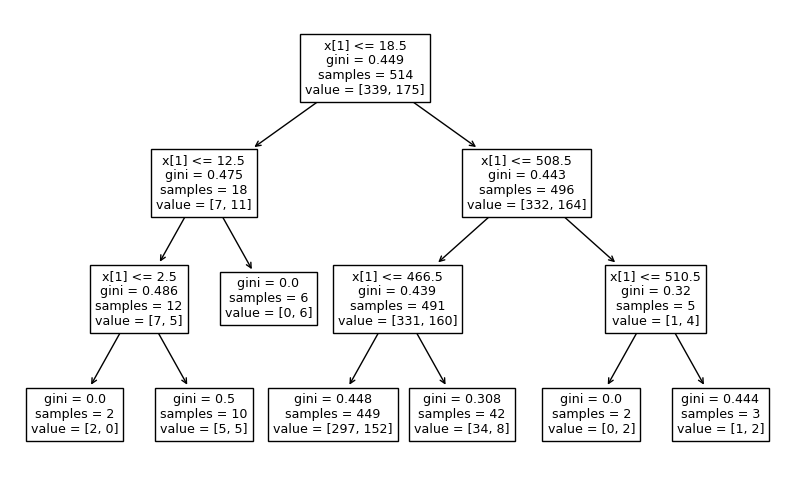

In [142]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()